# Unsupervised Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import umap

c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\amiteli\.conda\envs\PythonProject\lib\site-packages\umap\distances.

## Load Data 

In [3]:
dataFrame = pd.read_csv('..\..\datasets\Human_Activity\FinalFullDataAct.csv')

In [5]:
dataFrame.head()

,Unnamed: 0,index,timestamp,pressure,index_activity,activity,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,...,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,step_counter,light,number_of_devices_wifi,battery,bluetooth,diffTimeSec
0,0,1,2017-06-29 09:57:30,963.210350,0.0,Eat,52.0,11927.200000,7563.650340,32767.0,...,0.018634,-34.885090,-10.494576,7.990740,45.0,0.4,46.0,81.0,2.0,30.0
1,1,2,2017-06-29 09:58:00,963.377710,0.0,Eat,28.0,9694.366667,7582.004297,32767.0,...,-0.001961,-27.762173,-9.277909,-3.415510,32.0,2.0,56.0,80.8,2.0,30.0
2,2,3,2017-06-29 09:58:30,963.352867,0.0,Eat,25.0,7590.000000,7579.942257,32767.0,...,-0.176842,-23.574674,-13.215409,18.199073,8.0,2.0,57.0,80.6,2.0,30.0
3,3,4,2017-06-29 09:59:00,963.356162,0.0,Eat,52.0,11810.733333,7589.977663,32767.0,...,-0.343290,-11.147591,-8.746659,-4.144677,45.0,2.0,55.0,80.4,2.0,30.0
4,4,5,2017-06-29 09:59:30,963.335040,0.0,Eat,20.0,7881.866667,7600.249840,32767.0,...,-0.174356,-15.189257,-5.423743,-9.175927,19.0,1.6,55.0,80.2,4.0,30.0


In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4890 non-null   int64  
 1   index                   4890 non-null   int64  
 2   timestamp               4890 non-null   object 
 3   pressure                4890 non-null   float64
 4   index_activity          4890 non-null   float64
 5   activity                4890 non-null   object 
 6   step_detector           4890 non-null   float64
 7   audio_mic_1             4890 non-null   float64
 8   audio_mic_2             4890 non-null   float64
 9   audio_mic_3             4890 non-null   float64
 10  audio_mic_4             4890 non-null   float64
 11  gravity                 4890 non-null   float64
 12  linear_acceleration     4890 non-null   float64
 13  orientation_X           4890 non-null   float64
 14  orientation_Y           4890 non-null   

In [7]:
FeaturesTable = dataFrame.drop(columns=['Unnamed: 0','index','timestamp','index_activity','activity','diffTimeSec'])
FeaturesTable.head()

,pressure,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,linear_acceleration,orientation_X,orientation_Y,...,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,step_counter,light,number_of_devices_wifi,battery,bluetooth
0,963.210350,52.0,11927.200000,7563.650340,32767.0,45.0,9.428560,2.384370,22.952714,60.453024,...,-0.568192,0.018634,-34.885090,-10.494576,7.990740,45.0,0.4,46.0,81.0,2.0
1,963.377710,28.0,9694.366667,7582.004297,32767.0,45.0,9.495720,1.978390,43.617109,81.183346,...,-0.180258,-0.001961,-27.762173,-9.277909,-3.415510,32.0,2.0,56.0,80.8,2.0
2,963.352867,25.0,7590.000000,7579.942257,32767.0,45.0,9.548030,1.396605,4.632983,75.299680,...,-0.142885,-0.176842,-23.574674,-13.215409,18.199073,8.0,2.0,57.0,80.6,2.0
3,963.356162,52.0,11810.733333,7589.977663,32767.0,45.0,9.502039,5.458737,-32.125872,65.046507,...,-0.428465,-0.343290,-11.147591,-8.746659,-4.144677,45.0,2.0,55.0,80.4,2.0
4,963.335040,20.0,7881.866667,7600.249840,32767.0,45.0,9.609119,2.982487,135.779456,77.457162,...,-0.562955,-0.174356,-15.189257,-5.423743,-9.175927,19.0,1.6,55.0,80.2,4.0


In [8]:
label = dataFrame['activity']
label.unique()

array(['Eat', 'Walk', 'In computer', 'Sleep', 'Video games', 'Picnic ',
       'Meeting', 'Cooking', 'Movie', 'Pause'], dtype=object)

<Axes: xlabel='count', ylabel='activity'>

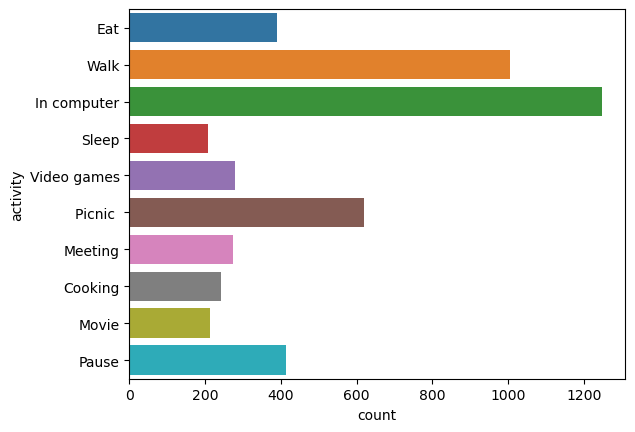

In [9]:
sns.countplot(y = label, data = label)

## split train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesTable, label, test_size=0.20, random_state=42)

In [12]:
# Map the class string names into numbers
class_names = sorted(label.unique().tolist())

# Create a mapping from class names to class numbers
class_to_number = {class_name: class_number for class_number, class_name in enumerate(class_names)}
print(class_to_number)

y_train_labels = list(map(class_to_number.get, y_train))
y_test_labels  = list(map(class_to_number.get, y_test))

y_test_labels = np.array(y_test_labels)
y_train_labels = np.array(y_train_labels)

{'Cooking': 0, 'Eat': 1, 'In computer': 2, 'Meeting': 3, 'Movie': 4, 'Pause': 5, 'Picnic ': 6, 'Sleep': 7, 'Video games': 8, 'Walk': 9}


<Axes: xlabel='count', ylabel='activity'>

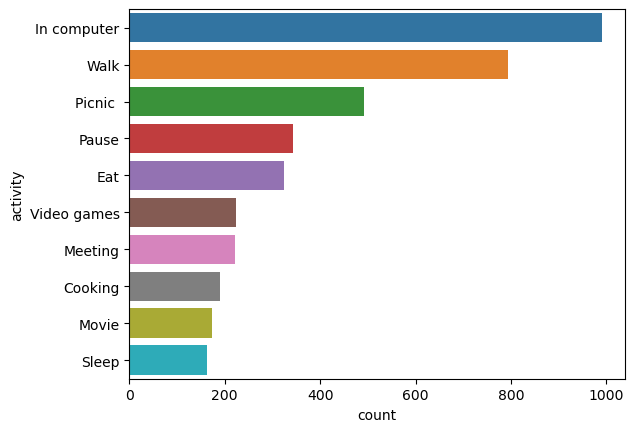

In [13]:
sns.countplot(y = y_train, order = y_train.value_counts().index)

<Axes: xlabel='count', ylabel='activity'>

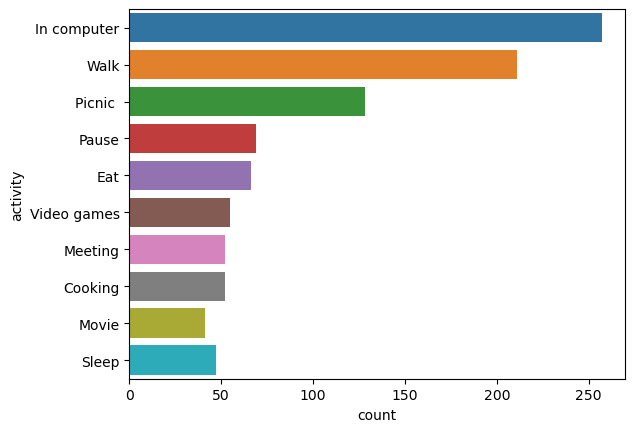

In [14]:
sns.countplot(y = y_test,order = y_train.value_counts().index)

## Standardize the Variables

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
scaled_features_test = scaler.transform(X_test)

## TSNE visualization

In [69]:
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components (for 2D visualization)
init = "random"  # "random" , "pca"
tsne = TSNE(n_components=2, perplexity=40, early_exaggeration=2,
            n_iter=300, random_state=0, learning_rate='auto',
            init=init, n_jobs=-1, verbose=0)

# Perform t-SNE embedding
tsne_result = tsne.fit_transform(X_train)

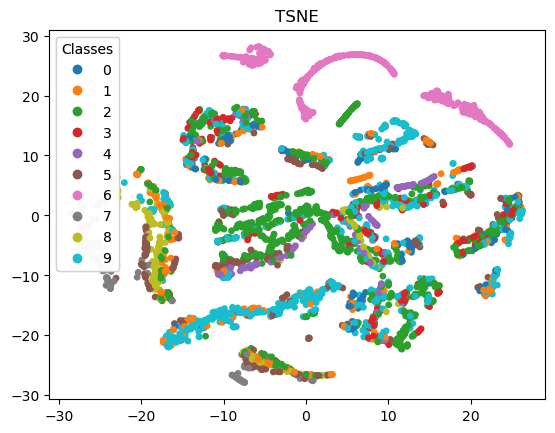

In [70]:
# Plot the TSNE
fig, ax = plt.subplots()
scatter = ax.scatter(x=tsne_result[:, 0], y=tsne_result[:, 1],
                        c=y_train_labels, s=15, cmap='tab10')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="best", title="Classes")
ax.add_artist(legend1)
plt.title(f"TSNE")
plt.show()
plt.close()

## K-means visualization

In [82]:
def get_best_match_labels(labels_true, labels_kmeans):
    reference_labels = retrieve_info(labels_kmeans, labels_true)

    labels_best_match = np.random.rand(len(labels_kmeans))
    for j in range(len(labels_kmeans)):
        labels_best_match[j] = reference_labels[labels_kmeans[j]]

    return labels_best_match

In [83]:
def get_acc_NMI(labels_true, labels_best_match):
    acc = accuracy_score(labels_true, labels_best_match)
    NMI = normalized_mutual_info_score(labels_true=labels_true, labels_pred=labels_best_match)

    return acc, NMI

In [158]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=10)
pca.fit(X_train)
x_train_pca = pca.transform(X_train)
x_test_pca  = pca.transform(X_test)

data_kmeans_train = x_train_pca # x_train_pca, X_train
data_kmeans_test  = x_test_pca  # x_test_pca , X_test

# K-means with sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10)  # Kmeans object
kmeans = kmeans.fit(data_kmeans_train)      # performe the clustering
pred   = kmeans.predict(data_kmeans_test)   # match between the cluster and label

In [159]:
#===  for matching and scoring the labels there are some options ===
# opt1
labels_best_match_test = get_best_match_labels(labels_true=y_test_labels, labels_kmeans=pred)
acc, NMI = get_acc_NMI(labels_true=y_test_labels, labels_best_match=labels_best_match_test)
print(f'Accuracy = {acc:.3f}%')
print(f'normalized_mutual_info_score = {NMI:.3f}')

# opt 2
hom_score = homogeneity_score(labels_true=y_test_labels, labels_pred=pred)
print(f"hom_score: {hom_score:.3f}")

Accuracy = 0.455%
normalized_mutual_info_score = 0.333
hom_score: 0.305


In [155]:
# results CM:
print(f"{np.unique(y_test_labels)=}")
print(f"{np.unique(labels_best_match_test)=}")

CM = confusion_matrix(y_test_labels, labels_best_match_test)
print(f"\nThe result confusion matrix is:\n{CM}")

np.unique(y_test_labels)=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np.unique(labels_best_match_test)=array([2., 6., 8., 9.])

The result confusion matrix is:
[[  0   0  34   0   0   0   0   0   1  17]
 [  0   0  26   0   0   0   0   0  23  17]
 [  0   0 201   0   0   0  16   0  11  29]
 [  0   0  44   0   0   0   0   0   0   8]
 [  0   0  41   0   0   0   0   0   0   0]
 [  0   0  33   0   0   0   0   0  30   6]
 [  0   0   6   0   0   0 122   0   0   0]
 [  0   0  16   0   0   0   0   0  31   0]
 [  0   0   9   0   0   0   0   0  46   0]
 [  0   0 132   0   0   0   1   0   3  75]]


## Run PCA with a loop over the n_components

Run a loop over n_components for the PCA to find the breaking point - to choose the best number of dim'

In [175]:
# Run PCA and Kmeans over a range of PCA n_components
total_acc = []
total_NMI = []
total_hom_score = []


for n_comp in range(1,20):
    pca = PCA(n_components=n_comp)
    pca.fit(X_train)
    x_train_pca = pca.transform(X_train)
    x_test_pca  = pca.transform(X_test)

    data_kmeans_train = x_train_pca # x_train_pca, X_train
    data_kmeans_test  = x_test_pca  # x_test_pca , X_test

    # K-means with sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    n_clusters = 10
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10)  # Kmeans object
    kmeans = kmeans.fit(data_kmeans_train)      # performe the clustering
    pred   = kmeans.predict(data_kmeans_test)   # match between the cluster and label

    #===  for matching and scoring the labels there are some options ===
    # opt1
    labels_best_match_test = get_best_match_labels(labels_true=y_test_labels, labels_kmeans=pred)
    acc, NMI = get_acc_NMI(labels_true=y_test_labels, labels_best_match=labels_best_match_test)
    # print(f'Accuracy = {acc:.3f}%')
    # print(f'normalized_mutual_info_score = {NMI:.3f}')
    total_acc.append(acc)
    total_NMI.append(NMI)

    # opt 2
    hom_score = homogeneity_score(labels_true=y_test_labels, labels_pred=pred)
    # print(f"hom_score: {hom_score:.3f}")
    total_hom_score.append(hom_score)

    # results CM:
    CM = confusion_matrix(y_test_labels, labels_best_match_test)
    # print(f"\nThe result confusion matrix is:\n{CM}")

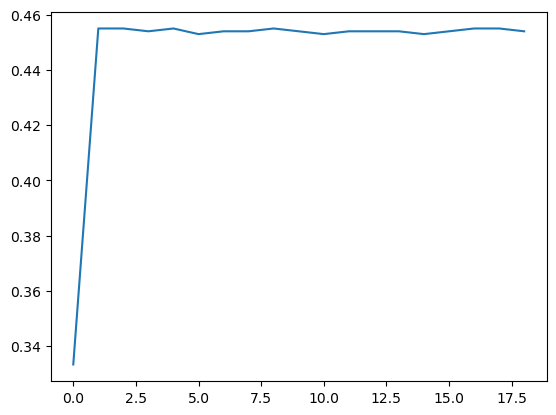

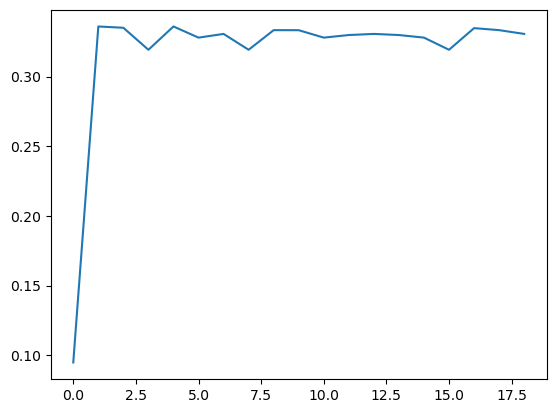

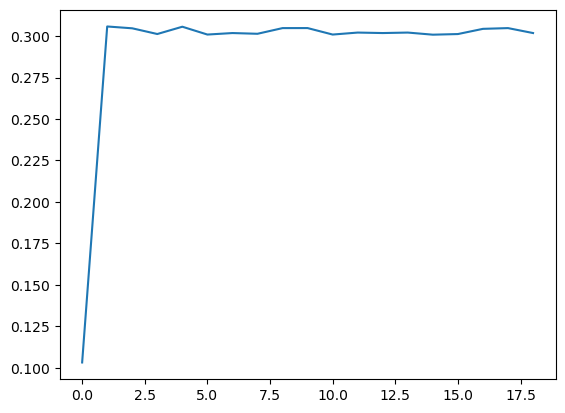

In [174]:
# Plot the different scores, search for the best b_components
plt.plot(total_acc)
plt.show()
plt.close()

plt.plot(total_NMI)
plt.show()
plt.close()

plt.plot(total_hom_score)
plt.show()
plt.close()

## UMAP

{'Cooking': 0, 'Eat': 1, 'In computer': 2, 'Meeting': 3, 'Movie': 4, 'Pause': 5, 'Picnic ': 6, 'Sleep': 7, 'Video games': 8, 'Walk': 9}


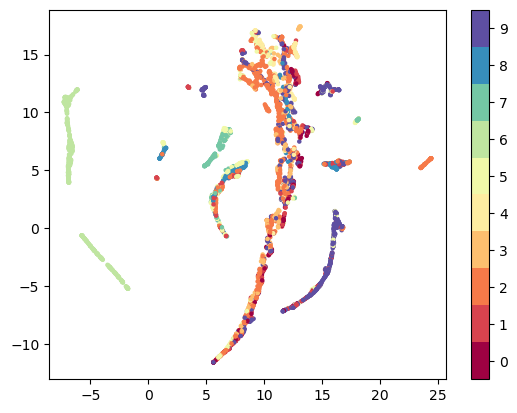

In [31]:
# see: https://umap-learn.readthedocs.io/en/latest/api.html

# Plot the UMAP graph of the dataset, (Amit: I dont think there is a good separation here...)
umap_obj = umap.UMAP(n_neighbors=20,  # to be in range of 2-100
                     n_components=2,
                     metric="euclidean", # euclidean, cosine, correlation, jaccard
                     n_epochs=None, 
                     learning_rate=1.0,
                     init='spectral',  # spectral, pca
                     random_state=0)

umap_embedding = umap_obj.fit_transform(X_train)

# Plot the results
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y_train_labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

print(class_to_number)